# IBMQ Usage Tutorial

A course material for **計算物理導論 Introduction to Computational Physics**
Course No.782025001

**This course material was made in 2023/04 for Qiskit Version < 1.0. There are some features has been deprecated.**


## Environment Setup

### For google colab setup

If you are using google colab, you will need to run the following part to setup enviroment.

In [1]:
# !pip install qiskit qiskit_aer qiskit_ibm_provider

## How to create a quantum circuit

### 1. Importing the necessary packages

In [2]:
## Importing the necessary packages
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi


### 2. Create a quantum circuit like this:
```txt
     ┌───┐┌───┐        ┌─┐
q_0: ┤ X ├┤ H ├──■─────┤M├
     ├───┤└───┘┌─┴─┐┌─┐└╥┘
q_1: ┤ X ├─────┤ X ├┤M├─╫─
     └───┘     └───┘└╥┘ ║ 
c: 2/════════════════╩══╩═
                     1  0 
```


In [3]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.name = "Intracell State"
# you can name the circuit by this.

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

print(circuit)

     ┌───┐┌───┐        ┌─┐
q_0: ┤ X ├┤ H ├──■─────┤M├
     ├───┤└───┘┌─┴─┐┌─┐└╥┘
q_1: ┤ X ├─────┤ X ├┤M├─╫─
     └───┘     └───┘└╥┘ ║ 
c: 2/════════════════╩══╩═
                     1  0 


## Running the quantum circuit on a simulator

### 1. Prepare the backend

At first we need to import the backend simulator.

In [4]:
from qiskit_aer import AerSimulator, AerProvider

A basic backend can be created with the following command

In [5]:
basicBackend = AerSimulator()

Also, there is more in `AerProvider` can be accessed, but we won't use them for this basic tutorial.


In [6]:
AerProvider().backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_statevector_gpu'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_density_matrix_gpu'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_unitary_gpu'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### 2. Make a job

And then we can make a job with the circuit we created before.

In [7]:
job01 = basicBackend.run(circuit)
job01

After running the job, we can get the result by using `result.get_counts()`.

In [8]:
result01 = job01.result()
print(result01)

Result(backend_name='aer_simulator', backend_version='0.11.2', qobj_id='0c896ab7-3f64-4256-8a87-8059c9a67729', job_id='7b2effc5-ccf4-4a78-b7e2-f0aa22c9326a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 500, '0x1': 524}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='Intracell State', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=3396607744, metadata={'parallel_state_update': 16, 'sample_measure_time': 0.000238847, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.001358976)], date=2023-04-26T04:18:54.786023

In [9]:
result01.get_counts()

{'10': 500, '01': 524}

And this will return a dictionary with the result of the measurement.

The result show that the measurement of our bits are `10` and `01`.

The probability of getting `10` is $\sim 0.5$ and `01` is $\sim 0.5$.

It can be calculated by dividing the number of getting `10` or `01` by the total number of shots, 

for the default number in local simulator is $1024$.

### 3. Futher usage

#### a. We can also use `plot_histogram` to plot the result.

In [10]:
from qiskit.visualization import plot_histogram

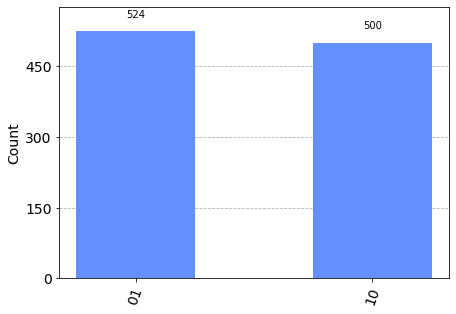

In [11]:
plot_histogram(result01.get_counts())

#### b. Or change the number of shots by using `job backend.run(circuit, shots=4096)`.

| The counts are:  {'10': 2036, '01': 2060}


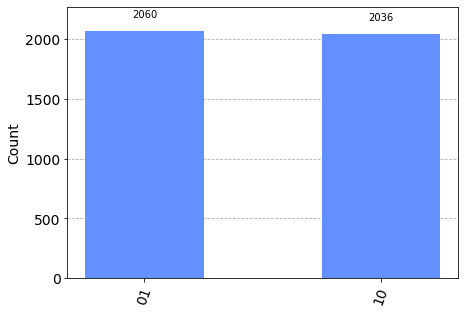

In [12]:
job02 = basicBackend.run(circuit, shots=4096)
result02 = job02.result()
# print(result01)
print("| The counts are: ", result02.get_counts())
plot_histogram(result02.get_counts())

#### c. Run multiple circuits at once

You can run multiple circuits at once by passing a list of circuits to `backend.run()`.
And you can put different circuits in the list.

We introduce some new circuit here for example.

In [13]:
qreg_q_cat = QuantumRegister(4, 'q')
circuit_cat = QuantumCircuit(qreg_q_cat)

circuit_cat.name = "GHZ State"

circuit_cat.h(qreg_q_cat[0])
circuit_cat.cx(qreg_q_cat[0], qreg_q_cat[1])
circuit_cat.cx(qreg_q_cat[1], qreg_q_cat[2])
circuit_cat.cx(qreg_q_cat[2], qreg_q_cat[3])

circuit_cat.measure_all()
# using the measure_all() method to measure all the qubits
# and it will add classical registers automatically,
# so you don't need to add classical registers manually.'

print(circuit_cat)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


Make a circuit list

In [14]:
multiple_circs = [
    circuit, circuit_cat, circuit_cat, circuit_cat, circuit
]
print([qc.name for qc in multiple_circs])

['Intracell State', 'GHZ State', 'GHZ State', 'GHZ State', 'Intracell State']


Then run it

In [15]:
job03 = basicBackend.run(multiple_circs, shots=4096)
result03 = job03.result()
# print(result01)
print("| The counts are: ")
result03.get_counts()

| The counts are: 


[{'10': 1996, '01': 2100},
 {'1111': 2070, '0000': 2026},
 {'0000': 2041, '1111': 2055},
 {'0000': 2018, '1111': 2078},
 {'01': 2063, '10': 2033}]

## Rnning the quantum circuit on IBMQ and a real quantum computer

At first we need to have an account of [IBM Quantum](https://quantum-computing.ibm.com/).

When you have an account of [IBM Quantum](https://quantum-computing.ibm.com/), you can get your API token in the [home page](https://quantum-computing.ibm.com/) after login.

![home_page](./home_page.png)

Copy the token and paste it on `IBMProvider.save_account`.

In [16]:
from qiskit_ibm_provider import IBMProvider

In [17]:
# IBMProvider.save_account('API_TOKEN') # paste your API_TOKEN here

After that, you can access the backends on **IBM Quantum** to load your account.


In [18]:
theIBMProvider = IBMProvider()

The followings are the backends on **IBM Quantum** you can access.
It's including the simulator and the real quantum computer.

In [19]:
theIBMProvider.backends()

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_washington')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_geneva')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_oslo')>]

With `simulator=False` we can show the of only real machine.

In [20]:
theIBMProvider.backends(simulator=False)

[<IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_washington')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_geneva')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_oslo')>]

### 2. Make a job on IBMQ

Pick a backend and run the job.
We use the circuit list we created before for example.

In [21]:
ibmqQASM = theIBMProvider.get_backend('ibmq_qasm_simulator')
ibmqQASM.name

'ibmq_qasm_simulator'

In [22]:
job11 = ibmqQASM.run(multiple_circs, shots=4096)
result11 = job11.result()
# print(result11)
print("| The counts are: ")
result11.get_counts()

| The counts are: 


[{'10': 2013, '01': 2083},
 {'0000': 2021, '1111': 2075},
 {'1111': 2036, '0000': 2060},
 {'1111': 2026, '0000': 2070},
 {'10': 2050, '01': 2046}]

### 3. Pending a job to real quantum computer
1. We need to pick a quantum computer to run the job.

In [23]:
from qiskit_ibm_provider import least_busy

`least_busy` can tell us which quantum computer is the least busy.

In [24]:
theLeastBusy = least_busy(theIBMProvider.backends(simulator=False))
theLeastBusy

<IBMBackend('ibm_hanoi')>

In this case, we pick the `ibmq_quito` to run the job.
It's a 5-qubit quantum computer.
You can use the following method to access it as backend.

1. by using `provider.get_backend('ibmq_quito')`, recommend this method.

In [25]:
theRealDevice = theIBMProvider.get_backend('ibmq_quito')
theRealDevice

<IBMBackend('ibmq_quito')>

2. by the attribute of `provider.backends.ibmq_quito`

In [26]:
theRealDevice = theIBMProvider.backend.ibmq_quito
theRealDevice

<IBMBackend('ibmq_quito')>

Before pending, we need to transpile the circuit list to the backend we picked.

Due to every quantum computer has different gate set and qubits layout, we need to transpile the circuit, then it can be runnable on the real machine.

In [27]:
from qiskit import transpile

In [28]:
transpiled_list = transpile(multiple_circs, backend=theRealDevice)
print("| Before: ")
print(multiple_circs[0])
print("-"*30+"divider"+"-"*30)
print("| After: ")
print(transpiled_list[0])

| Before: 
     ┌───┐┌───┐        ┌─┐
q_0: ┤ X ├┤ H ├──■─────┤M├
     ├───┤└───┘┌─┴─┐┌─┐└╥┘
q_1: ┤ X ├─────┤ X ├┤M├─╫─
     └───┘     └───┘└╥┘ ║ 
c: 2/════════════════╩══╩═
                     1  0 
------------------------------divider------------------------------
| After: 
global phase: 7π/4
               ┌─────────┐┌────┐┌──────────┐     ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(-π/2) ├──■──┤M├───
               └──┬───┬──┘└────┘└──────────┘┌─┴─┐└╥┘┌─┐
      q_1 -> 1 ───┤ X ├─────────────────────┤ X ├─╫─┤M├
                  └───┘                     └───┘ ║ └╥┘
ancilla_0 -> 2 ───────────────────────────────────╫──╫─
                                                  ║  ║ 
ancilla_1 -> 3 ───────────────────────────────────╫──╫─
                                                  ║  ║ 
ancilla_2 -> 4 ───────────────────────────────────╫──╫─
                                                  ║  ║ 
          c: 2/═══════════════════════════════════╩══╩═
                               

For `ibmq_quito` is a 5-qubit quantum computer, transpiler will redistribute the qubits and add ancilla to feet the layout of `ibmq_quito`.

Further explain can be found in [Qiskit Compiler and the Look-Ahead Swap Mapper](https://youtu.be/hidQGlKl_-E).

Then we can pending the job to `ibmq_quito`.

In [29]:
job12 = theRealDevice.run(transpiled_list, shots=4096)
job12.status()

<JobStatus.QUEUED: 'job is queued'>

Now, we are successfully pending the job on `ibmq_quito`.

And you can check the status of the job by using `job.status()`.

Remenmber to use `job.job_id()` to get the job id for retrieving the job when it's finished.

In [30]:
job12_id = job12.job_id()
job12_id

'ch43bo2ccl2b15otr7k0'

### 4. Retrieving the job

At [Jobs](https://quantum-computing.ibm.com/jobs) page, you can see the status of the job.

![./jobs.png](./jobs.png)

![./job_info.png](./job_info.png)

When the jobs are finished, you can retrieve the job by using `provider.retrieve_job(job_id='the job id')`.

In [31]:
retrieve_job12 = theIBMProvider.retrieve_job(job_id=job12_id)

In [32]:
retrieve_job12.result().get_counts()

[{'00': 355, '01': 1820, '10': 1833, '11': 88},
 {'0000': 1802,
  '0001': 129,
  '0010': 40,
  '0011': 42,
  '0100': 20,
  '0101': 8,
  '0110': 6,
  '0111': 89,
  '1000': 42,
  '1001': 2,
  '1010': 8,
  '1011': 75,
  '1100': 51,
  '1101': 115,
  '1110': 170,
  '1111': 1497},
 {'0000': 1774,
  '0001': 119,
  '0010': 45,
  '0011': 61,
  '0100': 27,
  '0101': 9,
  '0110': 12,
  '0111': 107,
  '1000': 69,
  '1001': 9,
  '1010': 8,
  '1011': 81,
  '1100': 54,
  '1101': 114,
  '1110': 186,
  '1111': 1421},
 {'0000': 1741,
  '0001': 125,
  '0010': 46,
  '0011': 54,
  '0100': 14,
  '0101': 12,
  '0110': 11,
  '0111': 104,
  '1000': 60,
  '1001': 11,
  '1010': 10,
  '1011': 61,
  '1100': 62,
  '1101': 110,
  '1110': 154,
  '1111': 1521},
 {'00': 313, '01': 1825, '10': 1859, '11': 99}]

Every job which run on IBM Quantum can be retrieved by using `provider.retrieve_job()`, just need to provide the job id.

In [33]:
retrieve_job11 = theIBMProvider.retrieve_job(job_id=job11.job_id())
retrieve_job11.result().get_counts()

[{'10': 2013, '01': 2083},
 {'0000': 2021, '1111': 2075},
 {'1111': 2036, '0000': 2060},
 {'1111': 2026, '0000': 2070},
 {'10': 2050, '01': 2046}]

In [34]:
result11.get_counts()

[{'10': 2013, '01': 2083},
 {'0000': 2021, '1111': 2075},
 {'1111': 2036, '0000': 2060},
 {'1111': 2026, '0000': 2070},
 {'10': 2050, '01': 2046}]

## More References

1. [Qiskit Documentation](https://qiskit.org/documentation/)
2. [Qiskit Aer Documentation](https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html)
3. [Qiskit IBM Provider Documentation - IBM Quantum Account](https://qiskit.org/ecosystem/ibm-provider/tutorials/1_the_ibm_quantum_account.html)